In [1]:
import numpy as np
from edge_pydb import EdgeTable
import matplotlib.pyplot as plt
from astropy.table import Table, join, unique
import seaborn as sns

In [2]:
manga = EdgeTable('manga_global.csv')
ecalifa = EdgeTable('ecalifa_global.csv')

In [3]:
t_carma = unique(EdgeTable('edge_carma.2d_smo7.hdf5', path='comom_dil').table, keys='Name')
t_aca   = unique(EdgeTable('edge_aca.2d_smo12.hdf5',  path='comom_dil').table, keys='Name')
t_aq    = unique(EdgeTable('almaquest.2d_preregrid.hdf5',  path='comom_dil').table, keys='Name')

In [4]:
# Limit global table to ALMaQUEST
aq_prop = join(t_aq, manga, keys='Name')

In [5]:
aq_prop

Name,ix,iy,ra_abs,dec_abs,ra_off,dec_off,rad_arc,azi_ang,snrpk_12,mom0_12,e_mom0_12,mom1_12,e_mom1_12,mom2_12,e_mom2_12,sigmol,e_sigmol,cosi,mangaid,objra,objdec,drp3qual,seemed,gfwhm,rfwhm,ifwhm,zfwhm,QC_flag,nsa_redshift,nsa_iauname,nsa_sersic_ba,nsa_sersic_phi,nsa_inclination,nsa_z_dMpc,r_band_abs_mag,g-r,DL,DA,Re_arc,Re_kpc,PA,ellip,log_Mass,e_log_Mass,log_SFR_Ha,e_log_SFR_Ha,log_SFR_ssp,log_NII_Ha_cen,e_log_NII_Ha_cen,log_OIII_Hb_cen,e_log_OIII_Hb_cen,log_SII_Ha_cen,e_log_SII_Ha_cen,log_OII_Hb_cen,e_log_OII_Hb_cen,EW_Ha_cen,e_EW_Ha_cen,Age_LW_Re_fit,e_Age_LW_Re_fit,Age_MW_Re_fit,e_Age_MW_Re_fit,vel_sigma_Re,log_SFR_SF,log_SFR_D_C,OH_O3N2_cen,e_OH_O3N2_cen,OH_N2_cen,e_OH_N2_cen,Ha_Hb_cen,e_Ha_Hb_cen,log_NII_Ha_Re,e_log_NII_Ha_Re,log_OIII_Hb_Re,e_log_OIII_Hb_Re,log_SII_Ha_Re,e_log_SII_Ha_Re,log_OII_Hb_Re,e_log_OII_Hb_Re,log_OI_Ha_Re,e_log_OI_Ha_Re,EW_Ha_Re,e_EW_Ha_Re,Ha_Hb_Re,e_Ha_Hb_Re,log_NII_Ha_ALL,e_log_NII_Ha_ALL,log_OIII_Hb_ALL,e_log_OIII_Hb_ALL,log_SII_Ha_ALL,e_log_SII_Ha_ALL,log_OII_Hb_ALL,e_log_OII_Hb_ALL,log_OI_Ha_ALL,e_log_OI_Ha_ALL,EW_Ha_ALL,e_EW_Ha_ALL,Ha_Hb_ALL,Sigma_Mass_cen,e_Sigma_Mass_cen,Sigma_Mass_Re,e_Sigma_Mass_Re,Sigma_Mass_ALL,e_Sigma_Mass_ALL,vel_disp_Ha_cen,vel_disp_ssp_cen,vel_disp_Ha_1Re,vel_disp_ssp_1Re,Av_gas_Re,e_Av_gas_Re,Av_ssp_Re,e_Av_ssp_Re,flux_Halpha6562.85_Re_fit,e_flux_Halpha6562.85_Re_fit,flux_Halpha6562.85_alpha_fit,e_flux_Halpha6562.85_alpha_fit,OH_Mar13_N2_Re_fit,e_OH_Mar13_N2_Re_fit,OH_Mar13_N2_alpha_fit,e_OH_Mar13_N2_alpha_fit,OH_Mar13_O3N2_Re_fit,e_OH_Mar13_O3N2_Re_fit,OH_Mar13_O3N2_alpha_fit,e_OH_Mar13_O3N2_alpha_fit,OH_Pet04_O3N2_Re_fit,e_OH_Pet04_O3N2_Re_fit,OH_Pet04_O3N2_alpha_fit,e_OH_Pet04_O3N2_alpha_fit,OH_Pil16_S_Re_fit,e_OH_Pil16_S_Re_fit,OH_Pil16_S_alpha_fit,e_OH_Pil16_S_alpha_fit
,,,deg,deg,deg,deg,arcsec,deg,,K km / s,K km / s,km / s,km / s,km / s,km / s,solMass / pc2,solMass / pc2,,,deg,deg,,arcsec,arcsec,arcsec,arcsec,arcsec,,,,,,,Mpc,mag,mag,Mpc,Mpc,arcsec,kpc,deg,,dex(solMass),dex(solMass),dex(solMass / yr),dex(solMass / yr),dex(solMass / yr),,,,,,,,,Angstrom,Angstrom,dex(yr),dex(yr),dex(yr),dex(yr),,dex(solMass / yr),dex(solMass / yr),dex,dex,dex,dex,,,,,,,,,,,,,Angstrom,Angstrom,,,,,,,,,,,,,Angstrom,Angstrom,,dex(solMass / pc2),dex(solMass / pc2),dex(solMass / pc2),dex(solMass / pc2),dex(solMass / pc2),dex(solMass / pc2),km / s,km / s,km / s,km / s,mag,mag,mag,mag,1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),dex,dex,dex,dex,dex,dex,dex,dex,dex,dex,dex,dex,dex,dex,dex,dex
str11,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str9,float64,float64,int64,float32,float32,float32,float32,float32,int64,float32,str19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
7815-12705,2,2,319.008179,9.525575,0.017745,-0.017500,199.873,-94.328,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.44051987,1-635503,318.990452837,9.54307564379,2,1.75207,2.59099,2.52587,2.51821,2.52388,0,0.0293012,J211557.49+093237.9,0.342398,144.757,63.862946,128.51247,-20.75506,0.5678,126.96763,119.82173,9.07305,5.2706404,234.757,0.89012575,10.916011,0.07247984,0.47811243,0.07287105,0.7775786,-0.48357794,0.3757811,-0.82960534,0.25941038,-0.770

(-3.0, 2.0)

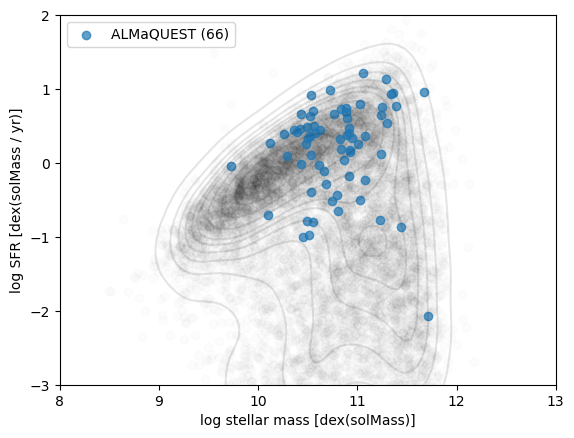

In [6]:
mangapd = manga.to_pandas()
sns.kdeplot(data=mangapd, x="log_Mass", y="log_SFR_Ha", color='k', alpha=0.1)
plt.scatter(manga['log_Mass'],manga['log_SFR_Ha'], color='k', alpha=0.01)
plt.scatter(aq_prop['log_Mass'], aq_prop['log_SFR_Ha'], alpha=0.7, 
            label='ALMaQUEST ('+str(len(aq_prop))+')')
plt.legend()
plt.xlabel('log stellar mass'+' ['+str(manga['log_Mass'].unit)+']')
plt.ylabel('log SFR'+' ['+str(manga['log_SFR_Ha'].unit)+']')
plt.xlim(8,13)
plt.ylim(-3,2)

(-4.0, 2.0)

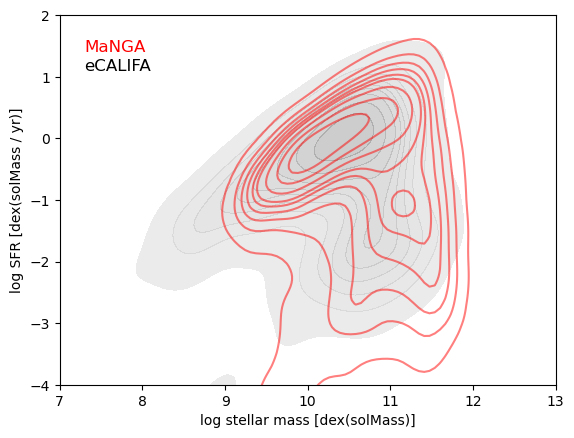

In [7]:
ecalifapd = ecalifa.to_pandas()
sns.kdeplot(data=ecalifapd, x="log_Mass", y="log_SFR_Ha", color='k', alpha=0.3, label='eCALIFA', fill=True)
sns.kdeplot(data=mangapd, x="log_Mass", y="log_SFR_Ha", color='r', alpha=0.5, label='MaNGA')
plt.xlabel('log stellar mass'+' ['+str(manga['log_Mass'].unit)+']')
plt.ylabel('log SFR'+' ['+str(manga['log_SFR_Ha'].unit)+']')
ax = plt.gca()
plt.text(0.05,0.90, 'MaNGA', color='r', fontsize=12, ha='left', transform=ax.transAxes)
plt.text(0.05,0.85, 'eCALIFA', color='k', fontsize=12, ha='left', transform=ax.transAxes)
plt.xlim(7,13)
plt.ylim(-4,2)

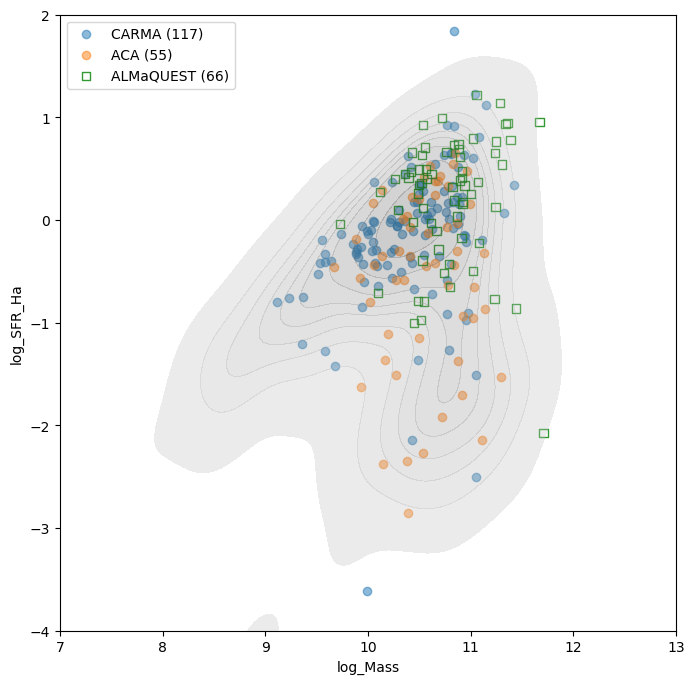

In [8]:
carma_prop = join(t_carma, ecalifa, keys='Name')
aca_prop = join(t_aca, ecalifa, keys='Name')

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(carma_prop['log_Mass'], carma_prop['log_SFR_Ha'], alpha=0.5, label='CARMA ('+str(len(carma_prop))+')')
plt.scatter(aca_prop['log_Mass'], aca_prop['log_SFR_Ha'], alpha=0.5, label='ACA ('+str(len(aca_prop))+')')
plt.scatter(aq_prop['log_Mass'], aq_prop['log_SFR_Ha'], alpha=0.8, marker='s', fc='none', ec='g', label='ALMaQUEST ('+str(len(aq_prop))+')')
sns.kdeplot(data=ecalifapd, x="log_Mass", y="log_SFR_Ha", color='k', alpha=0.3, label='eCALIFA', fill=True)
plt.legend(loc='upper left')
plt.xlim(7,13)
plt.ylim(-4,2)
plt.gca().set_aspect('equal')